# Descriptive Anlytics


In [8]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Colors
colors = ['#005055', '#64afa0', '#6ec34b', '#198cc3']

In [3]:
# Read the dataset
dta_file_path = 'MSI_2024_CEI_Afghanistan.dta'
csv_file_path = 'MSIA_2024_CEI Data.csv'

stata_data = pd.read_stata(dta_file_path, convert_categoricals=False)
original_data = pd.read_csv(csv_file_path)

In [ ]:
# Check basic information and first few rows of the stata
stata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 380 entries, starttime to pillar1
dtypes: datetime64[ns](4), float32(109), float64(128), int16(31), int32(1), int8(77), object(30)
memory usage: 611.7+ KB


In [ ]:
# Check basic information and first few rows of the csv
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 380 entries, starttime to pillar1
dtypes: float64(28), int64(37), object(315)
memory usage: 991.7+ KB


In [ ]:
# Read labels stata file
itr = pd.read_stata(dta_file_path, iterator=True)
itr.variable_labels()

{'starttime': 'starttime',
 'endtime': 'endtime',
 'deviceid': 'deviceid',
 'devicephonenum': 'devicephonenum',
 'subscriberid': 'subscriberid',
 'simid': 'simid',
 'DATAUSE': 'Client consent for sharing anonymous data',
 'DATE': "Enter today's date",
 'FACTYPE': 'Type of facility or site',
 'NAME_C': 'Enter the name of the Centre',
 'NAME_OR': 'Enter the name of the Outreach site',
 'NAME_SF': 'Enter the name of the Social Franchise',
 'NAME_MSL': 'Enter the name of the MS Lady/ site',
 'NAME_PSS': 'Enter the name of the PSS site',
 'NAME_OTH': 'Enter the name of the site',
 'REGION': 'Enter facility/site region',
 'LOCATION': 'Enter type of location',
 'TR2DH': 'How long did it take you to travel here today? Hours',
 'TR2DM': 'How long did it take you to travel here today? Minutes',
 'FPTYPE': 'FPTYPE',
 'FPTYPEFPMETH': 'Contraception: Contraceptive method(s) received',
 'FPTYPEFPREM': 'Contraception: Contraceptive method removed',
 'FPTYPEFPNO': 'Contraception: No contraceptive meth

### Data Collection Dates
#### 1. Check Overall Start Date and End Date

In [ ]:
overall_start_date = original_data['starttime'].min()  # Earliest start date
overall_end_date = original_data['endtime'].max()  # Latest end date

print(f"Data Collection Start Date: {overall_start_date}")
print(f"Data Collection End Date: {overall_end_date}")

Data Collection Start Date: 17-Dec-24
Data Collection End Date: 26-Dec-24


#### 2: Calculate the duration of data collection

## Module 1: Interview and Site Information

### Variables
- 'DATE': "Enter today's date",
- 'FACTYPE': 'Type of facility or site',
- 'NAME_C': 'Enter the name of the Centre',
- 'NAME_OR': 'Enter the name of the Outreach site',
- 'NAME_SF': 'Enter the name of the Social Franchise',
- 'NAME_MSL': 'Enter the name of the MS Lady/ site',
- 'NAME_PSS': 'Enter the name of the PSS site',
- 'NAME_OTH': 'Enter the name of the site',
- 'REGION': 'Enter facility/site region',
- 'LOCATION': 'Enter type of location',

### Analysis Questions
1. How is the distribution of facility types across regions?
2. What is the most common location type for different facility types?


#### 1. How is the distribution of facility types across regions?

In [ ]:
# How is the distribution of facility types across regions?
original_data['REGION'].replace('Other', 'Central', inplace=True)

facility_types = original_data.groupby(['REGION', 'FACTYPE']).size().reset_index(name='Count')
facility_types

,REGION,FACTYPE,Count
0,Central,MSI centre,29
1,East,MSI centre,10
2,North,MS Lady,65
3,North,MSI centre,32
4,North,Outreach,69
5,South,MS Lady,23
6,South,MSI centre,20
7,West,MS Lady,21
8,West,MSI centre,24
9,West,Outreach,41


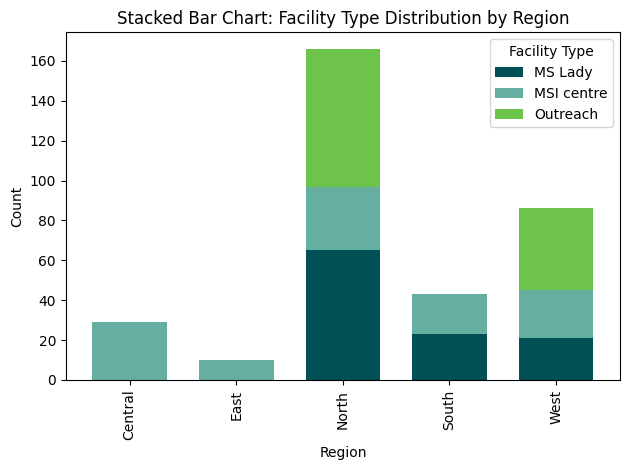

In [ ]:
# Visualization: Stacked bar chart
vis_facility_types = facility_types.pivot(index='REGION', columns='FACTYPE', values='Count')

vis_facility_types.plot(kind='bar', stacked=True, width=0.7, color=colors)
plt.title('Stacked Bar Chart: Facility Type Distribution by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Facility Type')
plt.tight_layout()

plt.show()

In [ ]:
# Add percentage/proportion column
region_totals = facility_types.groupby('REGION')['Count'].transform('sum')
facility_types['Percentage'] = (facility_types['Count'] / region_totals) * 100

In [ ]:
facility_types

,REGION,FACTYPE,Count,Percentage
0,Central,MSI centre,29,100.000000
1,East,MSI centre,10,100.000000
2,North,MS Lady,65,39.156627
3,North,MSI centre,32,19.277108
4,North,Outreach,69,41.566265
5,South,MS Lady,23,53.488372
6,South,MSI centre,20,46.511628
7,West,MS Lady,21,24.418605
8,West,MSI centre,24,27.906977
9,West,Outreach,41,47.674419


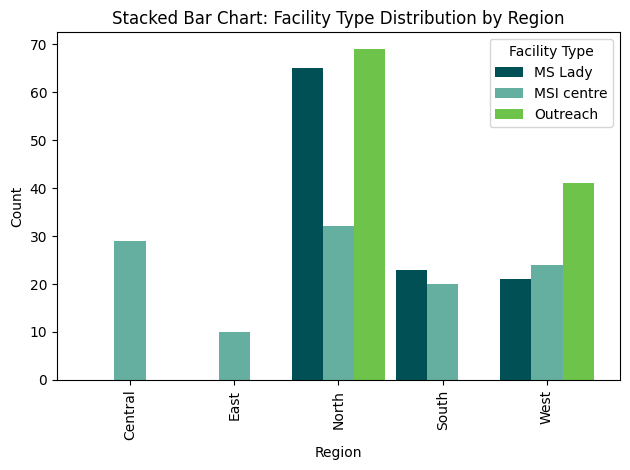

In [ ]:
# Visualization: Clustered bar chart
vis_facility_types = facility_types.pivot(index='REGION', columns='FACTYPE', values='Count')

vis_facility_types.plot(kind='bar', width=0.9, color=colors)
plt.title('Stacked Bar Chart: Facility Type Distribution by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Facility Type')
plt.tight_layout()

plt.show()

#### 2. What is the most common location type for different facility types?

In [ ]:
# Step: Cross-tabulation or contingency table between FACTYPE and LOCATION

common_location_type = pd.crosstab(original_data['FACTYPE'], original_data['LOCATION'])

common_location_type

LOCATION,Peri-urban,Rural,Urban
FACTYPE,,,
MS Lady,10,38,61
MSI centre,5,10,100
Outreach,62,25,23


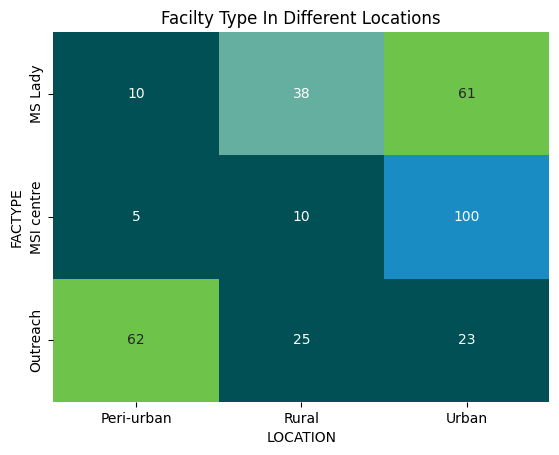

In [ ]:
#heatmap for visualization of above table
sns.heatmap(common_location_type, annot=True, cmap=colors, fmt='d', cbar=False)
plt.title("Facilty Type In Different Locations")
plt.show()

## Module 2: Demographic Module
### A. Demographic Profile
1. What is the age range and median age of the respondents?
2. What is the education distribution attained by the respondents?
3. What distribution of respondents are married, single, divorced, or widowed?
4. How many respondents have children, and what is the average number of children per respondent?

#### 1. What is the age range and median age of the respondents?

In [9]:
min_age = original_data['AGE'].min()
max_age = original_data['AGE'].max()
average_age = original_data['AGE'].mean()
median_age = original_data['AGE'].median()

print(f"The age range of respondents is: {min_age} to {max_age}")

print(f"The average age of respondents is {np.round(average_age, 2)} and median value is {round(median_age, 2)}")

The age range of respondents is: 15 to 55
The average age of respondents is 30.28 and median value is 30.0


#### 2. What is the education distribution attained by the respondents?

In [33]:
# Overall education level of respondents
education_level = original_data.groupby('EDU').size().reset_index(name='Count')

education_level = education_level.sort_values(by='Count')

education_level

,EDU,Count
4,"Some secondary, vocational or technical",9
5,Some tertiary or higher,16
1,"Completed secondary, vocational or technical",18
0,Completed primary,43
3,Some primary,54
2,None / non-formal,194


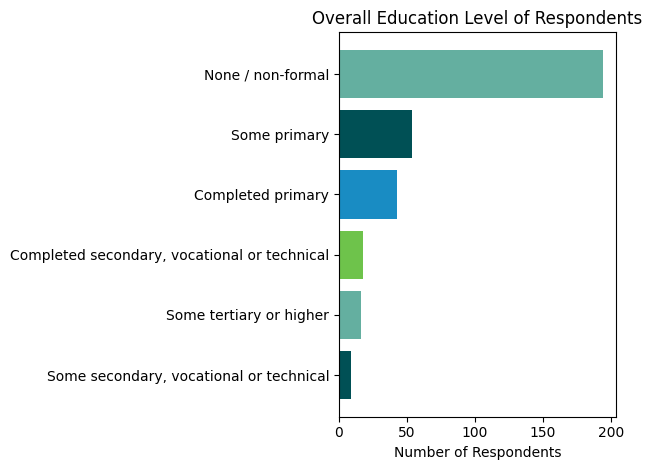

In [39]:
# Plotting the bar chart
plt.barh(education_level['EDU'], education_level['Count'],  color=colors)

# Adding chart details
plt.title('Overall Education Level of Respondents')
plt.xlabel('Number of Respondents')
plt.tight_layout()

plt.show()

In [22]:
# Region-based education level of each respodent
original_data.groupby(['REGION', 'EDU']).size().reset_index()

,REGION,EDU,0
0,East,None / non-formal,3
1,East,Some primary,6
2,East,Some tertiary or higher,1
3,North,Completed primary,12
4,North,"Completed secondary, vocational or technical",18
5,North,None / non-formal,91
6,North,Some primary,31
7,North,"Some secondary, vocational or technical",6
8,North,Some tertiary or higher,8
9,Other,None / non-formal,19


#### 3. What distribution of respondents are married, divorced, or widowed?

In [40]:
marital_status = original_data.groupby('MAR').size().reset_index(name="Count")

marital_status

,MAR,Count
0,Married,333
1,Widowed / Divorced / Separated,1


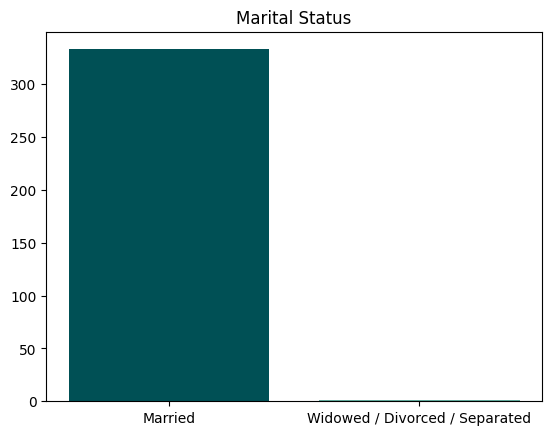

In [42]:
# plot the distribution
plt.bar(marital_status['MAR'], marital_status['Count'], color=colors)

# Adding chart details
plt.title('Marital Status')
plt.show()

#### 4. How many respondents have children, and what is the average number of children per respondent?

In [45]:
original_data.groupby('CHILD').size().reset_index(name='Total Respondents')

,CHILD,Total Respondents
0,0,5
1,1,31
2,2,42
3,3,60
4,4,50
5,5,47
6,6,34
7,7,17
8,8,24
9,9,13


In [51]:
print(f"Five respondents reported that they have {original_data['CHILD'].min()} number of children.")
print(f"On Average the respondents reported {round(original_data['CHILD'].mean(), 0)} number of children.")

Five respondents reported that they have 0 number of children.
On Average the respondents reported 4.0 number of children.
